Linear Regression with Multiple Variables

# Dataset and setup

- X has 8 examples and 4 features per example (shape: 8×4).
- y holds the target house prices in dollars.

We'll learn weights w (one per feature) and a bias b to predict price from features.

In [17]:
import numpy as np

x = np.array([
    [2104, 3, 10, 5],
    [1600, 3, 20, 8],
    [2400, 3, 15, 3],
    [1416, 2, 30, 12],
    [3000, 4, 8, 2],
    [1985, 4, 25, 9],
    [1534, 3, 35, 15],
    [1427, 2, 40, 20]
])

# Prices (target)
y = np.array([399900, 329900, 369000, 232000, 539900, 299900, 199000, 149000])


# Feature Scalling 

## Two Main Way to Scale

In [18]:
def min_max_scalling(x , y ):
    x_scalled = (x - x.mean()) / (x.max() - x.min())
    y_scalled = (y  - y.mean()) / (y.max() - y.min())
    return x_scalled , y_scalled

In [19]:
def standardization_scalling(x , y):
    x_scaled = ( x - x.mean(axis=0)) / x.std(ddof=0)
    y_scaled=  ( y - y.mean()) / y.std()
    return x_scaled , y_scaled

In [20]:
x , y = standardization_scalling(x , y)
print(f"{x} \n {'-' * 70} \n {y}")

[[ 1.95788229e-01  0.00000000e+00 -1.47629485e-02 -4.87320629e-03]
 [-3.82116705e-01  0.00000000e+00 -3.29658072e-03 -1.43329597e-03]
 [ 5.35192714e-01  0.00000000e+00 -9.02976459e-03 -7.16647983e-03]
 [-5.93097871e-01 -1.14663677e-03  8.16978701e-03  3.15325113e-03]
 [ 1.22317478e+00  1.14663677e-03 -1.70562220e-02 -8.31311661e-03]
 [ 5.93384530e-02  1.14663677e-03  2.43660314e-03 -2.86659193e-04]
 [-4.57794732e-01  0.00000000e+00  1.39029709e-02  6.59316145e-03]
 [-5.80484866e-01 -1.14663677e-03  1.96361547e-02  1.23263453e-02]] 
 ---------------------------------------------------------------------- 
 [ 0.72865939  0.12911596  0.46400379 -0.70938836  1.92774626 -0.12783122
 -0.99203026 -1.42027557]


In [21]:
def prediction(x , w, b):
    return float(np.dot(w , x) + b)

# Prediction function

For a single example x (length-4 vector), the model predicts:

ŷ = w · x + b

We'll reuse this in cost and gradient calculations.

In [22]:
def compute_cost(x , y ,w , b):
    m = x.shape[0]
    total_cost = 0.0
    for i in range(m):
        total_cost += (prediction(x[i] , w , b) - y[i]) ** 2
    return total_cost / (2*m)

# Cost (Mean Squared Error)

We measure how well the model fits the data using the average squared error:

J(w, b) = (1/2m) Σ_i (ŷ_i - y_i)^2

Lower cost means better fit.

In [23]:
# Quick sanity cost check with zeros
print(f"Compute cost with zeros: {compute_cost(x, y, np.zeros(x.shape[1]), 0):.2e}")

Compute cost with zeros: 5.00e-01


In [24]:
def compute_gradients(x , y , w , b):
    m , n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0.0
    for i in range(m):
        err = prediction(x[i] , w, b) - y[i] 
        for j in range(n):
            dj_dw[j] += err * x[i , j]
        dj_db += err
    return dj_dw / m , dj_db / m

# Gradients

We compute partial derivatives of J with respect to each weight w_j and bias b. These tell us how to update parameters to reduce the cost.

In [25]:
def gradient_descent(x , y , w, b , alpha , num_iters):
    compute_history = []
    for i in range(num_iters):
        dj_dw , dj_db = compute_gradients(x , y, w , b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if(i%100 == 0):
            cost = compute_cost(x , y, w, b)
            compute_history.append(cost) 
            print(f"iter:{i:6d} cost:{cost:.2e}")
    return w , b , compute_history

# Gradient Descent

Iteratively update parameters:
- w := w - α ∂J/∂w
- b := b - α ∂J/∂b

We also log cost every 10,000 steps to monitor progress.

In [38]:
w, b, compute_history = gradient_descent(
    x, y,
    np.zeros(x.shape[1]), 0.0,
    alpha=0.0009, num_iters=50000
)
print(f"Final parameters:\n w = {w}\n b = {b}")
print(f"Final cost = {compute_cost(x, y, w, b)}")

iter:     0 cost:5.00e-01
iter:   100 cost:4.73e-01
iter:   200 cost:4.49e-01
iter:   300 cost:4.26e-01
iter:   400 cost:4.04e-01
iter:   500 cost:3.84e-01
iter:   600 cost:3.65e-01
iter:   700 cost:3.47e-01
iter:   800 cost:3.30e-01
iter:   900 cost:3.15e-01
iter:  1000 cost:3.00e-01
iter:  1100 cost:2.86e-01
iter:  1200 cost:2.73e-01
iter:  1300 cost:2.61e-01
iter:  1400 cost:2.50e-01
iter:  1500 cost:2.39e-01
iter:  1600 cost:2.29e-01
iter:  1700 cost:2.20e-01
iter:  1800 cost:2.11e-01
iter:  1900 cost:2.03e-01
iter:  2000 cost:1.95e-01
iter:  2100 cost:1.88e-01
iter:  2200 cost:1.81e-01
iter:  2300 cost:1.75e-01
iter:  2400 cost:1.69e-01
iter:  2500 cost:1.63e-01
iter:  2600 cost:1.58e-01
iter:  2700 cost:1.53e-01
iter:  2800 cost:1.49e-01
iter:  2900 cost:1.44e-01
iter:  3000 cost:1.40e-01
iter:  3100 cost:1.36e-01
iter:  3200 cost:1.33e-01
iter:  3300 cost:1.30e-01
iter:  3400 cost:1.26e-01
iter:  3500 cost:1.24e-01
iter:  3600 cost:1.21e-01
iter:  3700 cost:1.18e-01
iter:  3800 

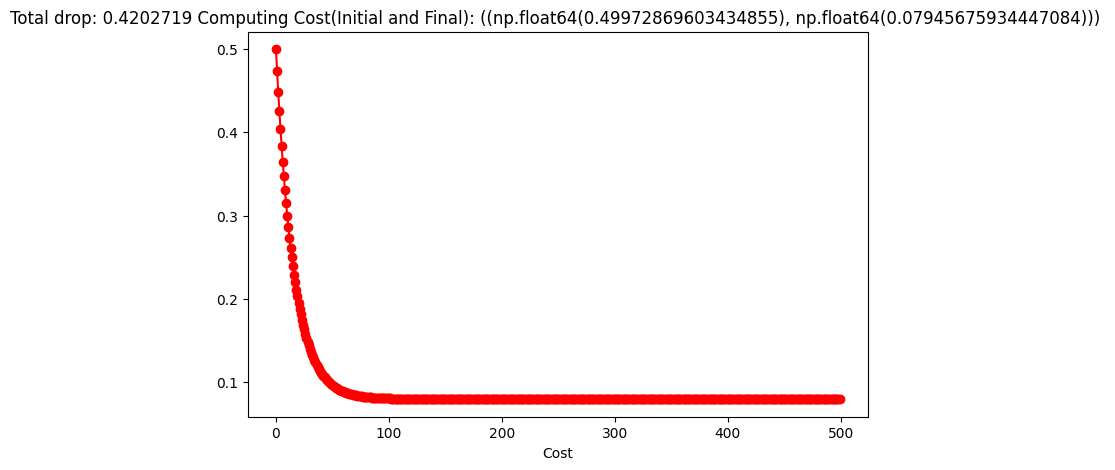

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8 , 5))
plt.plot(range(len(compute_history)) , compute_history , 
color='red',
marker='o')
plt.xlabel("Itaration every 5000")
plt.xlabel('Cost')
plt.title(f'Total drop: {compute_history[0]-compute_history[-1]:.7f} Computing Cost(Initial and Final): ({compute_history[0] , compute_history[-1]}) ')


value=False
if value:
    for i in range(len(compute_history)):
        plt.text(i , compute_history[i] , f'{compute_history[i]:.3f}')
plt.show()

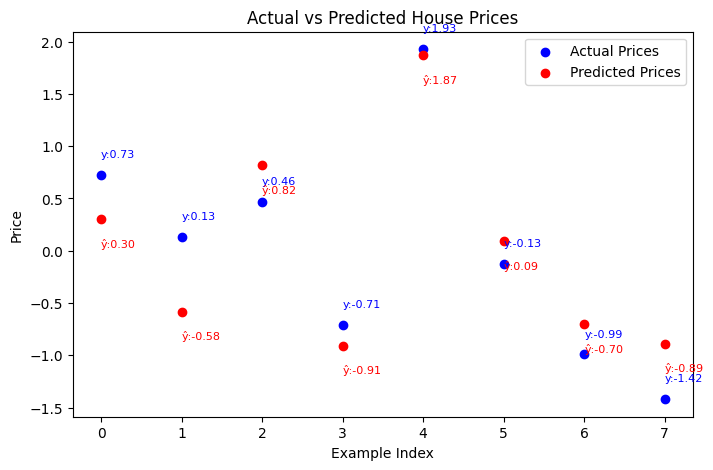

In [28]:
import matplotlib.pyplot as plt

predictions = x @ w + b
plt.figure(figsize=(8 , 5))
plt.scatter(range(len(y)), y, color='blue', label='Actual Prices')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted Prices')
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Example Index")
plt.ylabel("Price")
plt.legend()

annotate = True  # set True if you really want labels
if annotate:
    dy = (y.max() - y.min())
    for i in range(len(y)):
        plt.text(i, y[i] + 0.05 * dy, f"y:{y[i]:.2f}", color='blue', fontsize=8)
        plt.text(i, predictions[i] - 0.08 * dy, f"ŷ:{predictions[i]:.2f}", color='red', fontsize=8)

plt.show()

# Visualizing predictions

After training, we compare actual prices vs. model predictions to see how well the model fits this small dataset.

# Plot fitted line vs a single feature

To visualize the learned linear relationship, we can plot the model prediction as a line with respect to one feature (e.g., square footage) while holding the other features at their mean values.

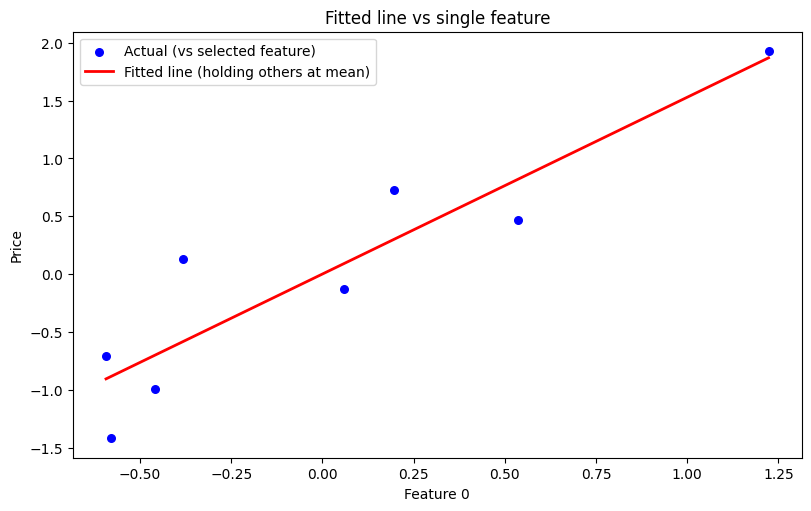

In [29]:
# Choose a feature to visualize (0: sqft, 1: bedrooms, 2: age, 3: distance or similar)
feature_index = 0  # square footage

# Create a range for the selected feature
x_feat = x[:, feature_index]
feat_min, feat_max = x_feat.min(), x_feat.max()
feat_grid = np.linspace(feat_min, feat_max, 100)

# Hold other features at their means
x_means = x.mean(axis=0)

# Build a design matrix where only the chosen feature varies
x_line = np.tile(x_means, (feat_grid.shape[0], 1))
x_line[:, feature_index] = feat_grid

y_line = x_line @ w + b

plt.figure(figsize=(8, 5), constrained_layout=True)  # use constrained_layout
plt.scatter(x_feat, y, color='blue', label='Actual (vs selected feature)', s=30)
plt.plot(feat_grid, y_line, color='red', linewidth=2, label='Fitted line (holding others at mean)')
plt.title('Fitted line vs single feature')
plt.xlabel(f'Feature {feature_index}')
plt.ylabel('Price')
plt.legend()
# removed: plt.tight_layout()  # can trigger oversized layout with many decorations
plt.show()